## 3D visual_cryptography Generator

### Step 1: generate the 2D visual patterns.

In [1]:
import os 
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

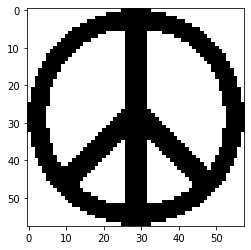

In [2]:
# Import image.
img_name = "peace"
img_filename = "peace.png"
img = Image.open("../res/{}".format(img_filename)).convert("RGBA")
background = Image.new("RGBA", img.size, (255,255,255))
img = Image.alpha_composite(background, img)

img = img.convert("L")
img = np.array(img, dtype=np.uint8)

# Thickening.
for idx in range(0):
    idx_black = np.where(img == 0)
    img[tuple([item + 1 for item in idx_black])] = 0
    img[tuple([item - 1 for item in idx_black])] = 0
img = Image.fromarray(img, "L")
    
# Scale down and binarilize.
# img.thumbnail([int(i*0.1) for i in img.size])
img_base_resolution = 115
img.thumbnail([img_base_resolution, img_base_resolution * (img.size[0] / img.size[1])])
img = np.array(img)
img[img < 200] = 0
img[img > 0] = 1
    
# Show image.
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(img, cmap="gray", vmin=0, vmax=1)

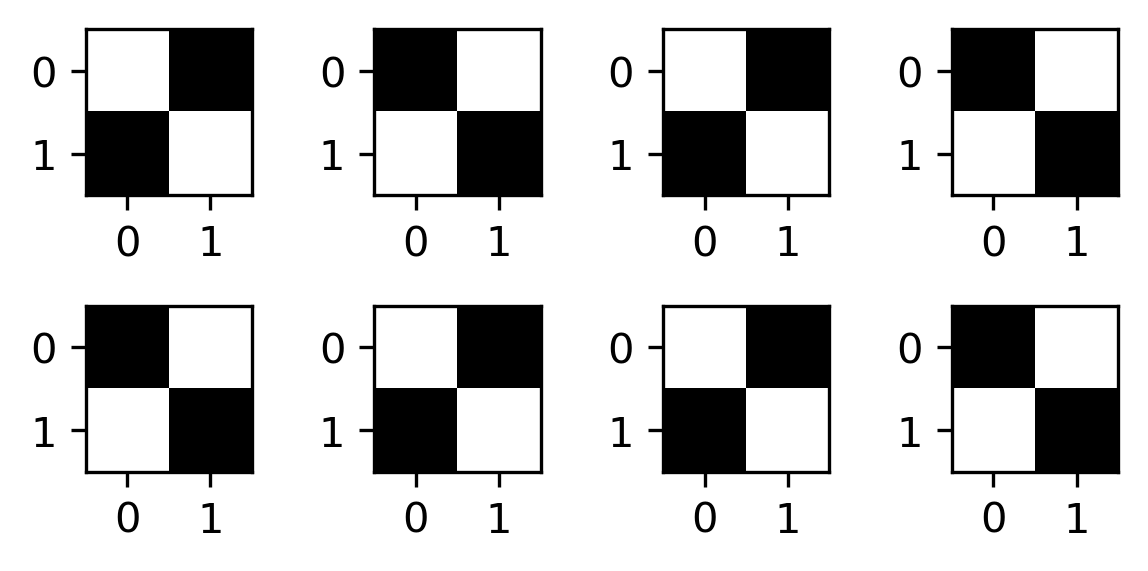

In [3]:
# Sub-pixel patterns.
# black_patterns = [
#     ([[0, 1], [0, 0]], [[1, 0], [0, 0]]),
#     ([[0, 1], [0, 0]], [[1, 0], [1, 0]]),
#     ([[0, 1], [1, 0]], [[0, 0], [0, 1]]),
#     ([[0, 1], [1, 0]], [[1, 0], [0, 1]]),
# ]

# white_patterns = [
#     ([[0, 0], [1, 0]], [[0, 0], [1, 0]]),
#     ([[0, 0], [1, 0]], [[0, 1], [1, 0]]),
#     ([[0, 1], [1, 0]], [[0, 0], [1, 0]]),
#     ([[0, 1], [1, 0]], [[1, 0], [1, 0]]),
# ]

black_patterns = [
    ([[1, 0], [0, 1]], [[0, 1], [1, 0]]),
    ([[0, 1], [1, 0]], [[1, 0], [0, 1]]),
]

white_patterns = [
    ([[1, 0], [0, 1]], [[1, 0], [0, 1]]),
    ([[0, 1], [1, 0]], [[0, 1], [1, 0]]),
]

# Visualize.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(4, 2), dpi=300)
for idx_pattern in range(len(black_patterns)):
    up_black = black_patterns[idx_pattern][0]
    down_black = black_patterns[idx_pattern][1]
    up_white = white_patterns[idx_pattern][0]
    down_white = white_patterns[idx_pattern][1]
    
    axes[0, idx_pattern].imshow(up_black, cmap="gray")
    axes[1, idx_pattern].imshow(down_black, cmap="gray")
    axes[0, idx_pattern + len(black_patterns)].imshow(up_white, cmap="gray")
    axes[1, idx_pattern + len(black_patterns)].imshow(down_white, cmap="gray")
fig.tight_layout()

Image size: (116, 116)


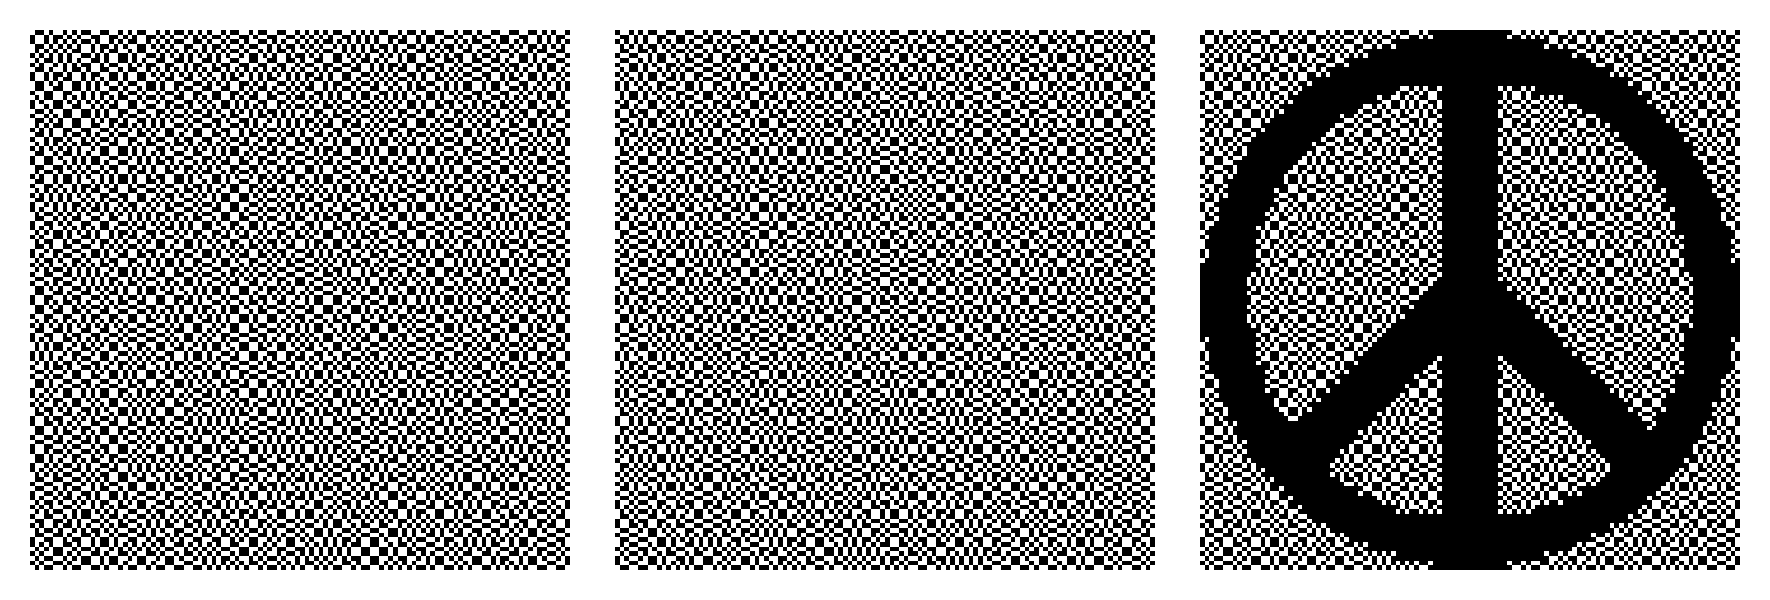

In [4]:
# Spliting image.
img_left = np.ones((img.shape[0]*2, img.shape[1]*2), dtype=int)
img_right = np.ones((img.shape[0]*2, img.shape[1]*2), dtype=int)

# Apply pixels.
# Generator random pattern indexes.
idx_patterns = np.random.randint(0, len(black_patterns), (img.shape))

for idx_row in range(img.shape[0]):
    for idx_col in range(img.shape[1]):
        idx_pattern = idx_patterns[idx_row, idx_col]
        left_pattern, right_pattern = black_patterns[idx_pattern] if img[idx_row, idx_col] < 0.5 else white_patterns[idx_pattern]
        
        # Set image. 
        img_left[idx_row*2:idx_row*2+2, idx_col*2:idx_col*2+2] = left_pattern
        img_right[idx_row*2:idx_row*2+2, idx_col*2:idx_col*2+2] = right_pattern

# Superpositioning image.
# img_super = img_left + img_right
# img_super[img_super >= 1] = 1
img_super = np.logical_and(img_left, img_right).astype(np.int8)

# Show. 
print("Image size: {}".format(img_super.shape))
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=300)
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
axes[0].imshow(img_left, cmap="gray", vmin=0, vmax=1)
axes[1].imshow(np.flip(img_right, axis=1), cmap="gray", vmin=0, vmax=1)
# axes[1].imshow(img_right, cmap="gray", vmin=0, vmax=1)
axes[2].imshow(img_super, cmap="gray")
fig.tight_layout()

In [5]:
# Save image.
# Use .frombytes instead of .fromarray. 
# This is >2x faster than img_grey
def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

base_size = 1000
h_size = int(base_size * (img_left.shape[1] / img_left.shape[0]))
img_frombytes(img_left).resize((base_size, h_size)).save(
    "../export/{}_left_{}.bmp".format(img_name, img_base_resolution))
img_frombytes(img_right).resize((base_size, h_size)).save(
    "../export/{}_right_{}.bmp".format(img_name, img_base_resolution))

### Step 2: generate 3D patterns.